In [1]:
from functions import *
from PointNet import PointNet
from PointCNN import PointCNN

I0000 00:00:1710935618.209380       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 88), renderer: Apple M3 Max
INFO: Created TensorFlow Lite XNNPACK delegate for CPU.
I0000 00:00:1710935618.241300       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 88), renderer: Apple M3 Max


In [2]:
# Refer to functions.py if you want to merge multiple datasets

dataset1 = "./set2/Train_Alphabet"
# dataset2 = "./asl_dataset"
# dataset3 = "./extras"
destination_path1 = "./landmarks_1"
# destination_path2 = "./landmarks_2"
# destination_path3 = "./landmarks_3"

# CREATING DATASET DO NOT UNCOMMENT. 
create_dataset(dataset1,destination_path1, transform)
# create_dataset(dataset2,destination_path2, transform)
# create_dataset(dataset3,destination_path3, transform)


Processing Train_Alphabet
Processing R
Processing U
Processing I
Processing N
Processing G
Processing Z
Processing T
Processing S
Processing A
Processing F
Processing O
Processing H
Processing Blank
Processing del
Processing space
Processing M
Processing J
Processing C
Processing D
Processing V
Processing Q
Processing X
Processing E
Processing B
Processing K
Processing L
Processing Y
Processing P
Processing W
Created 56632


In [3]:
# merge_folders(destination_path2, destination_path1)
# merge_folders(destination_path3, destination_path1)

In [4]:
items = load_dataset(destination_path1)

training, validation = random_split(items, [0.9, 0.1])
training_input_tensor = torch.Tensor([x[0] for x in training])
training_output_tensor = torch.LongTensor([int(x[1]) for x in training],device=device).long()
validation_input_tensor = torch.Tensor([x[0] for x in validation])
validation_output_tensor = torch.Tensor([int(x[1]) for x in validation], device=device).long()

/var/folders/3y/j1sjc53s5kd68c_jg7jw90pr0000gn/T/ipykernel_85220/2308339370.py:4: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/torch/csrc/utils/tensor_new.cpp:278.)
  training_input_tensor = torch.Tensor([x[0] for x in training])


In [5]:
print("Training: ", training_input_tensor.shape, training_output_tensor.shape)
print("Validation: ", validation_input_tensor.shape, validation_output_tensor.shape)

Training:  torch.Size([44070, 21, 3]) torch.Size([44070])
Validation:  torch.Size([4896, 21, 3]) torch.Size([4896])


In [6]:
batch_size = 128
epochs = 10

print(len(char2int))
tensor_train_dataset = TensorDataset(training_input_tensor,training_output_tensor) 
train_dataloader = DataLoader(tensor_train_dataset, batch_size = batch_size, shuffle = True)
tensor_val_dataset = TensorDataset(validation_input_tensor,validation_output_tensor)
val_dataloader = DataLoader(tensor_val_dataset, batch_size = batch_size, shuffle = True)
model1 = PointNet(len(char2int)).to(device)
model2 = PointCNN(len(char2int)).to(device)

29


In [7]:
loss_train_all1, acc_train_all1, loss_val_all1, acc_val_all1 = train_model(model1,epochs,train_dataloader,val_dataloader,"PointNet-LR0.0001",learn_rate=0.0001)

Current epoch:0
Loss train 0.8208434226288311 Loss val 0.2772638450066249 Acc train 0.8859208143275717 Acc val 0.9597355769230769
Current epoch:1
Loss train 0.18126323817000872 Loss val 0.1459303861245131 Acc train 0.9742813215739485 Acc val 0.9775641025641025
Current epoch:2
Loss train 0.10223543178560077 Loss val 0.1125237926458701 Acc train 0.9825467201246731 Acc val 0.9783653846153846
Current epoch:3
Loss train 0.06931209078841451 Loss val 0.08682649659040646 Acc train 0.9876275266426197 Acc val 0.9793669871794872
Current epoch:4
Loss train 0.049076445357523105 Loss val 0.08360523673204276 Acc train 0.9915081521739131 Acc val 0.9803685897435898
Current epoch:5
Loss train 0.03694766591694476 Loss val 0.06975282785984185 Acc train 0.9935831425846486 Acc val 0.9817708333333334
Current epoch:6
Loss train 0.02803047959679279 Loss val 0.06822547106406628 Acc train 0.9953041570774023 Acc val 0.9823717948717948
Current epoch:7
Loss train 0.020357799851268097 Loss val 0.06482458291336513 Ac

In [8]:
loss_train_all2, acc_train_all2, loss_val_all2, acc_val_all2 = train_model(model1,epochs,train_dataloader,val_dataloader,"PointNet-LR0.00001",learn_rate=0.00001)

Current epoch:0
Loss train 0.007186255385370358 Loss val 0.0502775091265973 Acc train 0.9992980072463769 Acc val 0.9867788461538461
Current epoch:1
Loss train 0.005250476005460149 Loss val 0.050087307926076345 Acc train 0.9996066933092864 Acc val 0.9865785256410257
Current epoch:2
Loss train 0.004398027794314144 Loss val 0.0493891020783056 Acc train 0.999705615942029 Acc val 0.9869791666666666
Current epoch:3
Loss train 0.00385140771302732 Loss val 0.05144883145411045 Acc train 0.9998641304347826 Acc val 0.9861778846153846
Current epoch:4
Loss train 0.0037392298377159497 Loss val 0.05007739236148504 Acc train 0.9997961956521739 Acc val 0.9859775641025641
Current epoch:5
Loss train 0.0032733587031860065 Loss val 0.05105416966566386 Acc train 0.9998188405797102 Acc val 0.9853766025641025
Current epoch:6
Loss train 0.00298432185402329 Loss val 0.04868356369208927 Acc train 0.9998867753623188 Acc val 0.9871794871794872
Current epoch:7
Loss train 0.0027973300001273554 Loss val 0.04927287629

In [9]:
loss_train_all3, acc_train_all3, loss_val_all3, acc_val_all3 = train_model(model2,epochs,train_dataloader,val_dataloader,"PointCNN-LR0.001",learn_rate=0.001)

Current epoch:0
Loss train 2.286352223244266 Loss val 1.7816185523302128 Acc train 0.2789604786513508 Acc val 0.42407852564102566
Current epoch:1
Loss train 1.6151415475900623 Loss val 1.5376756772016869 Acc train 0.47991156560787257 Acc val 0.5100160256410257
Current epoch:2
Loss train 1.4952425548995751 Loss val 1.4698892954068306 Acc train 0.5117729786513509 Acc val 0.5130208333333334
Current epoch:3
Loss train 1.444001815630042 Loss val 1.4740985081746028 Acc train 0.522194412652997 Acc val 0.5076121794871795
Current epoch:4
Loss train 1.412283988966458 Loss val 1.414440965041136 Acc train 0.5343380530675252 Acc val 0.5300480769230769
Current epoch:5
Loss train 1.3888897066530974 Loss val 1.4206307240021534 Acc train 0.5357110507246376 Acc val 0.5362580128205128
Current epoch:6
Loss train 1.374024710447892 Loss val 1.368979533513387 Acc train 0.5424926106480584 Acc val 0.5474759615384616
Current epoch:7
Loss train 1.3642218508582185 Loss val 1.373876602221758 Acc train 0.5439252001

In [10]:
loss_train_all4, acc_train_all4, loss_val_all4, acc_val_all4 = train_model(model2,epochs,train_dataloader,val_dataloader,"PointCNN-LR0.01",learn_rate=0.01)

Current epoch:0
Loss train 1.9177714430767556 Loss val 1.7398261687694452 Acc train 0.42054729219796 Acc val 0.41386217948717946
Current epoch:1
Loss train 1.584395144296729 Loss val 1.5385488057747865 Acc train 0.47169384057971014 Acc val 0.4931891025641026
Current epoch:2
Loss train 1.5274172171302465 Loss val 1.6976141501695683 Acc train 0.48864893204923987 Acc val 0.4417067307692308
Current epoch:3
Loss train 1.4989846471427144 Loss val 1.5390254503641374 Acc train 0.4971205186152804 Acc val 0.4933894230769231
Current epoch:4
Loss train 1.484682171241097 Loss val 1.535323555652912 Acc train 0.5040963482165682 Acc val 0.5092147435897436
Current epoch:5
Loss train 1.477315446259319 Loss val 1.4609712667954273 Acc train 0.5061308161072109 Acc val 0.5250400641025641
Current epoch:6
Loss train 1.4618553842323414 Loss val 1.5018073870585515 Acc train 0.5104738749455715 Acc val 0.508613782051282
Current epoch:7
Loss train 1.4550249255221823 Loss val 1.4740561888768122 Acc train 0.51401721

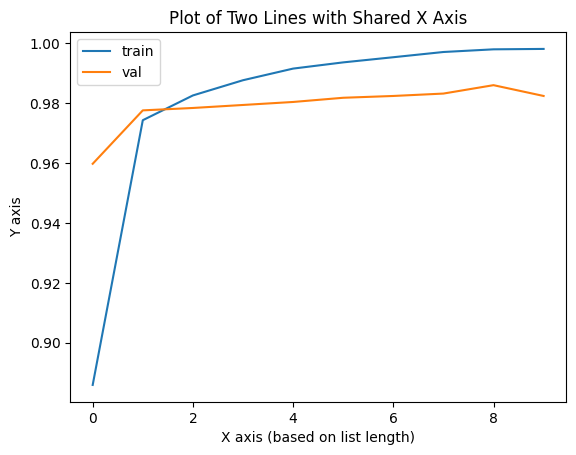

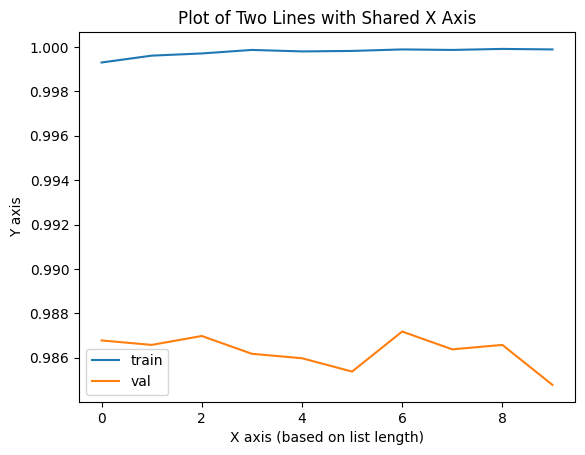

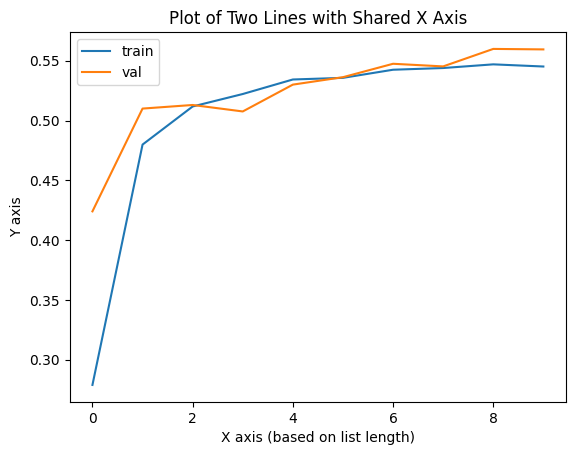

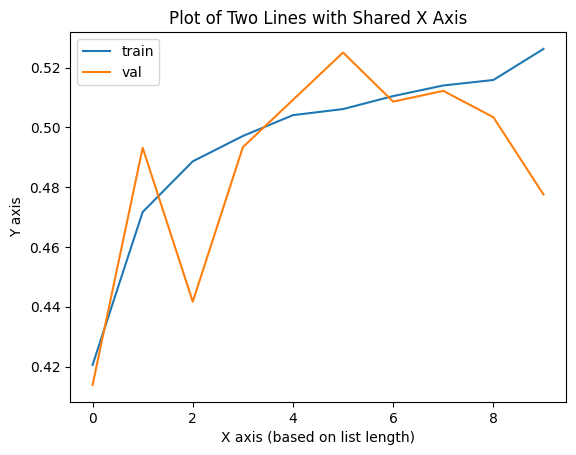

In [11]:
def plot_two_lines_same_x(y1, y2):
    if len(y1) != len(y2):
        raise ValueError("The lists must have the same length.")

    x = list(range(len(y1)))  # Generates an x-axis based on the length of the y-values lists

    plt.plot(x, y1, label='train')
    plt.plot(x, y2, label='val')
    plt.xlabel('X axis (based on list length)')
    plt.ylabel('Y axis')
    plt.title('Plot of Two Lines with Shared X Axis')
    plt.legend()
    plt.show()

plot_two_lines_same_x(acc_train_all1, acc_val_all1)
plot_two_lines_same_x(acc_train_all2, acc_val_all2)
plot_two_lines_same_x(acc_train_all3, acc_val_all3)
plot_two_lines_same_x(acc_train_all4, acc_val_all4)

In [2]:
model_path1 = "./saved_models/PointNet-LR0.0001/model_10.pth"
model_path2 = "./saved_models/PointNet-LR0.00001/model_10.pth"

actuals1, predicteds1, count1, failcount1, wrongs1, errored1 = predict_images(model_path1, "./set2/Test_Alphabet", "./misclassified")
actuals2, predicteds2, count2, failcount2, wrongs2, errored2 = predict_images(model_path2, "./set2/Test_Alphabet", "./misclassified")

Current sign:test_alphabet
Current sign:r


/Users/ryanng/Desktop/50.021 Proj/functions.py:281: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/torch/csrc/utils/tensor_new.cpp:278.)
  pointst = torch.tensor([points]).float().to(device)


Current sign:u
Current sign:i
Current sign:n
Current sign:g
Current sign:z
Current sign:t
Current sign:s
Current sign:a
Current sign:f
Current sign:o
Current sign:h
Current sign:blank
Current sign:del
Current sign:space
Current sign:m
Current sign:j
Current sign:c
Current sign:d
Current sign:v
Current sign:q
Current sign:x
Current sign:e
Current sign:b
Current sign:k
Current sign:l
Current sign:y
Current sign:p
Current sign:w
Current sign:test_alphabet
Current sign:r
Current sign:u
Current sign:i
Current sign:n
Current sign:g
Current sign:z
Current sign:t
Current sign:s
Current sign:a
Current sign:f
Current sign:o
Current sign:h
Current sign:blank
Current sign:del
Current sign:space
Current sign:m
Current sign:j
Current sign:c
Current sign:d
Current sign:v
Current sign:q
Current sign:x
Current sign:e
Current sign:b
Current sign:k
Current sign:l
Current sign:y
Current sign:p
Current sign:w


In [3]:
print(errored1)
accuracy1 = calculate_accuracy(actuals1, predicteds1)
print(accuracy1)

['./set2/Test_Alphabet/del/.DS_Store', './set2/Test_Alphabet/space/.DS_Store']
0


In [4]:
print(errored2)
accuracy2 = calculate_accuracy(actuals2, predicteds2)
print(accuracy2)

['./set2/Test_Alphabet/del/.DS_Store', './set2/Test_Alphabet/space/.DS_Store']
0.9937332139659804
